In [1]:
import pandas as pd

In [2]:
tar=pd.read_csv(r"C:\Users\salun\OneDrive\Desktop\imarticus\DataSetPython\NLP dataset\AmazonFoodReviews.csv")


In [3]:
tar.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
tar = tar.loc[: , ['Text','Score']]

In [5]:
tar.head()

,Text,Score
0,I have bought several of the Vitality canned d...,5
1,Product arrived labeled as Jumbo Salted Peanut...,1
2,This is a confection that has been around a fe...,4
3,If you are looking for the secret ingredient i...,2
4,Great taffy at a great price. There was a wid...,5


In [6]:
tar['Text'] = tar['Text'].str.lower()

In [7]:

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\salun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
from nltk.corpus import stopwords

In [9]:
l1=list(stopwords.words('english'))
l1

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
def text_process(mess):            ### creating a function

    """                                                        ## a docstring
    1. remove the punctuation

    2. remove the stopwords

    3. return the list of clean textwords
    """

    nopunc = [char for char in mess if char not in string.punctuation]

    nopunc = "".join(nopunc)

    

    return [ word for word in nopunc.split() if word not in l1]

In [12]:
tar['Text'].apply(text_process)

0         [bought, several, vitality, canned, dog, food,...
1         [product, arrived, labeled, jumbo, salted, pea...
2         [confection, around, centuries, light, pillowy...
3         [looking, secret, ingredient, robitussin, beli...
4         [great, taffy, great, price, wide, assortment,...
                                ...                        
568449    [great, sesame, chickenthis, good, better, res...
568450    [im, disappointed, flavor, chocolate, notes, e...
568451    [stars, small, give, 1015, one, training, sess...
568452    [best, treats, training, rewarding, dog, good,...
568453    [satisfied, product, advertised, use, cereal, ...
Name: Text, Length: 568454, dtype: object

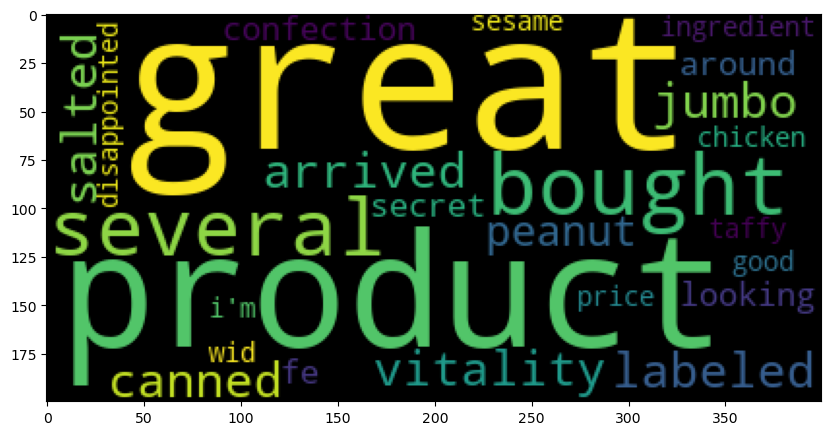

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
cloud =WordCloud(stopwords=stopwords.words('english') , max_words=25).generate(str(tar['Text']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [15]:
df1= tar[tar.Score==0] #ham
df2= tar[tar.Score==1]

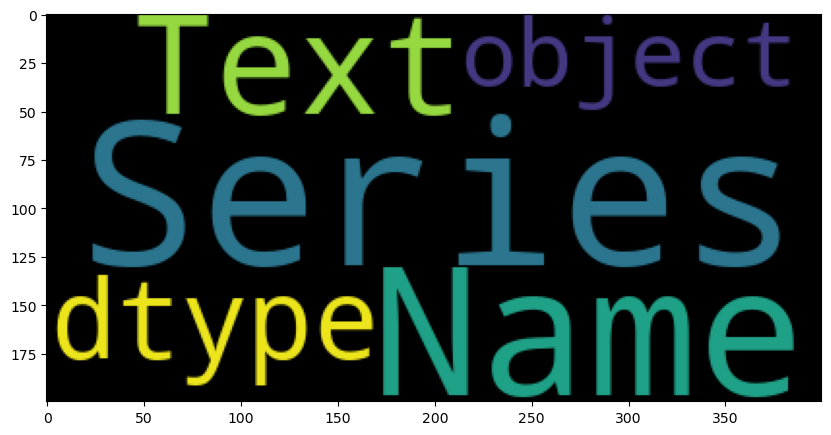

In [17]:
cloud =WordCloud(stopwords=stopwords.words('english') , max_words=25).generate(str(df1['Text']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

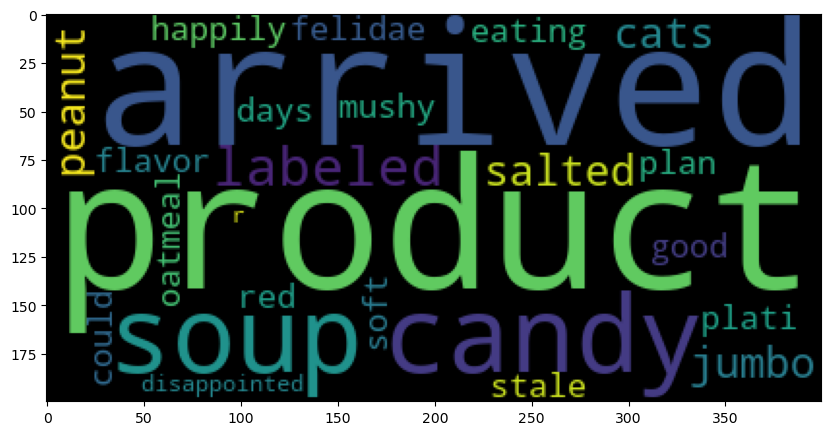

In [18]:
cloud =WordCloud(stopwords=stopwords.words('english') , max_words=25).generate(str(df2['Text']))
plt.figure(figsize=(10,10))
plt.imshow(cloud)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
bow_transformer = CountVectorizer(analyzer = text_process).fit(tar['Text']) # it just name bow,,,,, we take any name

In [18]:
messages_bow = bow_transformer.transform(tar['Text'])

In [19]:
type(messages_bow)

scipy.sparse._csr.csr_matrix

In [20]:
from sklearn.model_selection import train_test_split

ch_train_x,ch_test_x,ch_train_y,ch_test_y = train_test_split(messages_bow ,tar['Score'],test_size=.2)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier()
# rf.fit(ch_train_x, ch_train_y)
# pred_test = rf.predict(ch_test_x)
# pred_test
# tab1 = confusion_matrix(ch_test_y , pred_test)
# print(tab1)
# print(classification_report(ch_test_y,pred_test))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(ch_train_x , ch_train_y)
pred_test = dt.predict(ch_test_x)
pred_test
tab1 = confusion_matrix(ch_test_y , pred_test)
print(tab1)
print(classification_report(ch_test_y,pred_test))

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(ch_train_x , ch_train_y)
pred_test = logreg.predict(ch_test_x)
pred_test
tab1 = confusion_matrix(ch_test_y , pred_test)
print(tab1)
print(classification_report(ch_test_y,pred_test))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(ch_train_x , ch_train_y)
pred_nb = nb.predict(ch_test_x)
tab_nb = confusion_matrix(ch_test_y , pred_test)
print(tab_nb)
print(classification_report(ch_test_y,pred_test))